<a href="https://colab.research.google.com/github/rbzkaf/Multi_Armed_Bandit_Algorithms/blob/master/viz_algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualizing Cumulative Rewards

In [3]:
import matplotlib.pyplot as plt
import pandas as pd



In [4]:
egreed_df = pd.read_csv("Epsilon_Greedy_1_sim_10000_pulls")

# Rewards = [0.2,0.2,0.2,0.2,0.4]

#E-Greedy

     Unnamed: 0  Epsilon  Simulation  Pull_no  Chosen_arm  Reward  Cumul_Reward
0             0      0.1         1.0      1.0         0.0     0.0           0.0
1             1      0.1         1.0      2.0         0.0     0.0           0.0
2             2      0.1         1.0      3.0         0.0     0.0           0.0
3             3      0.1         1.0      4.0         0.0     0.0           0.0
4             4      0.1         1.0      5.0         0.0     0.0           0.0
..          ...      ...         ...      ...         ...     ...           ...
295         295      0.1         1.0    296.0         4.0     1.0         106.0
296         296      0.1         1.0    297.0         4.0     0.0         106.0
297         297      0.1         1.0    298.0         4.0     1.0         107.0
298         298      0.1         1.0    299.0         4.0     0.0         107.0
299         299      0.1         1.0    300.0         4.0     1.0         108.0

[300 rows x 7 columns]
       Unnamed: 

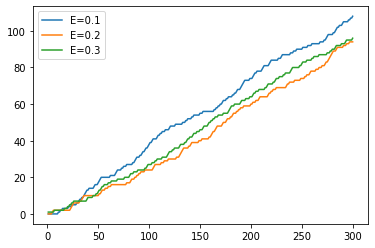

In [14]:
eps = egreed_df.Epsilon.unique()
gk_e = egreed_df.groupby("Epsilon")

for ep in eps:
    data = gk_e.get_group(ep)
    data = data[:300]
    print(data)
    label = "E="+str(float(ep))
    plt.plot(data["Pull_no"], data["Cumul_Reward"], label=label)


plt.legend()
plt.show()

Observation: High Epsilon performs well at the beginning but once they figure out best arm, lower epsilon exploits better

In [6]:
ucb_df = pd.read_csv("UCB_1_sim_1000_pulls")

#UCB

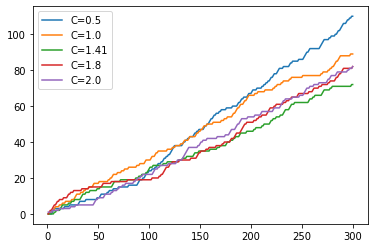

In [8]:


conf = ucb_df.Confidence.unique()
gk_c = ucb_df.groupby("Confidence")

for con in conf:
    data = gk_c.get_group(con)
    data = data[:300]
    label = "C="+str(float(con))
    plt.plot(data["Pull_no"], data["Cumul_Reward"], label=label)


plt.legend()
plt.show()

#Thompson Sampling

In [9]:
thom_df = pd.read_csv("Thompson_1_sim_1000_pulls")

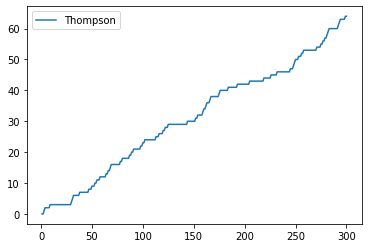

In [13]:
data = thom_df
data = data[:300]
plt.plot(data["Pull_no"], data["Cumul_Reward"], label="Thompson")
plt.legend()
plt.show()

# Comparison of the 3 algorithms

CTR = [0.2, 0.2, 0.2, 0.2, 0.4]

In [37]:
def compare(egreed_df,ucb_df,thom_df):
  egreed_df = egreed_df.groupby("Pull_no")
  egreed_df = egreed_df.mean()
  egreed_df = egreed_df.reset_index()


  ucb_df = ucb_df.groupby("Pull_no")
  ucb_df = ucb_df.mean()
  ucb_df = ucb_df.reset_index()

  thom_df = thom_df.groupby("Pull_no")
  thom_df = thom_df.mean()
  thom_df = thom_df.reset_index()


  plt.plot(egreed_df["Pull_no"], egreed_df["Cumul_Reward"], label="E-greed")
  plt.plot(ucb_df["Pull_no"], ucb_df["Cumul_Reward"], label="UCB")
  plt.plot(thom_df["Pull_no"], thom_df["Cumul_Reward"], label="Thompson")

  plt.legend()
  plt.show()

In [35]:
egreed_df = pd.read_csv("Epsilon_Greedy_100_sim_300_pulls")
egreed_df = egreed_df[egreed_df["Epsilon"] == 0.1]

ucb_df = pd.read_csv("UCB_100_sim_300_pulls")
ucb_df = ucb_df[ucb_df["Confidence"] == 0.5]

thom_df = pd.read_csv("Epsilon_Greedy_100_sim_300_pulls")


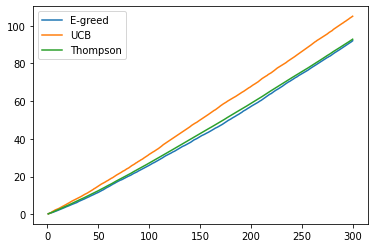

In [38]:
compare(egreed_df,ucb_df,thom_df)

CTR = [0.1, 0.12, 0.08, 0.14, 0.15]

Testing higher horizon, small differences between click through rate

In [41]:
egreed_df = pd.read_csv("Epsilon_Greedy_100_sim_400_pulls")
egreed_df = egreed_df[egreed_df["Epsilon"] == 0.1]

ucb_df = pd.read_csv("UCB_100_sim_400_pulls")
ucb_df = ucb_df[ucb_df["Confidence"] == 0.5]

thom_df = pd.read_csv("Epsilon_Greedy_100_sim_400_pulls")

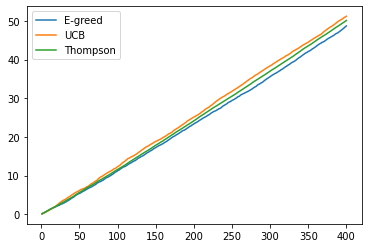

In [42]:
compare(egreed_df,ucb_df,thom_df)